# Assignment 01

In [1]:
import numpy as np
from math import pi,sqrt

import matplotlib.pyplot as plt 

## a. Generate Data

In [2]:
np.random.seed(99)
x = list(np.linspace(0,1,20))
# x = list(np.random.uniform(0,1,20))
y = [np.sin(2*pi*xi)+np.random.normal(0,1) for xi in x]
print(x)
print(y)

[0.0, 0.05263157894736842, 0.10526315789473684, 0.15789473684210525, 0.21052631578947367, 0.2631578947368421, 0.3157894736842105, 0.3684210526315789, 0.42105263157894735, 0.47368421052631576, 0.5263157894736842, 0.5789473684210527, 0.631578947368421, 0.6842105263157894, 0.7368421052631579, 0.7894736842105263, 0.8421052631578947, 0.894736842105263, 0.9473684210526315, 1.0]
[-0.14235884270194815, 2.381921206786178, 0.897474653795702, 2.1669784565190735, 0.8147784148919016, 0.927553633876584, 1.670953811732976, 1.5613705591857538, 0.3628781833357507, -2.2032430044473728, -0.3316440228872668, 0.2094505744756603, -0.7122238021882018, -0.4595720471639394, -0.7260917109402527, -2.404408409805764, 0.04565066792224015, -1.1942943766299394, -0.8262647731542903, 0.5909532944575225]


In [3]:
x_train, y_train = [], []
x_test, y_test = [], []
for index in range(0, 20, 2):
    x_train.append(x[index])
    y_train.append(y[index])
    x_test.append(x[index+1])
    y_test.append(y[index+1])

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

x_train

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842])

In [4]:
X_train = x_train.reshape(-1,1)
X_test = x_test.reshape(-1,1)

## b. Find Weights

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

def calculate_erms(y1, y2):
    return sqrt(sum((y1-y2)**2)/float(len(y1)))

order = [0, 1, 3, 9]

weight_list = []
train_error=[]
test_error=[]

x_sample = np.linspace(0,1,100).reshape(-1,1)
y_sample_original = np.sin(2*pi*x_sample)
y_sample_predict_list = []

for i in range(len(order)):
    
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=order[i])),
#         ('scalar', StandardScaler()),
        ('linear', LinearRegression(fit_intercept=False))
    ])
    
    model = model.fit(X_train, y_train)
    w = model.named_steps['linear'].coef_
    weight_list.append(list(w))

    y_sample_predict = model.predict(x_sample)
    y_sample_predict_list.append(y_sample_predict)

    y_train_predict = model.predict(X_train)
    train_error.append(calculate_erms(y_train_predict, y_train))
    y_test_predict = model.predict(X_test)
    test_error.append(calculate_erms(y_test_predict, y_test))

print('weight: ')
print(weight_list)

weight: 
[[0.10531525798066108], [0.8598514475897326, -1.5929097336191513], [-0.0432309182357261, 10.831970538372707, -30.643487636008693, 19.87629639696921], [-0.1423588427385606, 255.6106739280018, -5642.032661956589, 49844.812417045905, -229803.69448939615, 614945.8729813966, -992376.1258863813, 953063.6850723529, -501759.98653322074, 111482.15000979006]]


## c. Display Weights in Table

In [6]:
import pandas as pd

column_label = []
for i in range(len(weight_list[-1])):
    column_label.append('w'+str(i))
    
row_label = []
for i in order:
    row_label.append('M='+str(i))

df = pd.DataFrame(weight_list, columns=column_label, index=row_label)

df = df.fillna('')
df

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9
M=0,0.105315,,,,,,,,,
M=1,0.859851,-1.59291,,,,,,,,
M=3,-0.043231,10.832,-30.6435,19.8763,,,,,,
M=9,-0.142359,255.611,-5642.03,49844.8,-229804,614946,-992376,953064,-501760,111482


## d. Charts of Fit Data

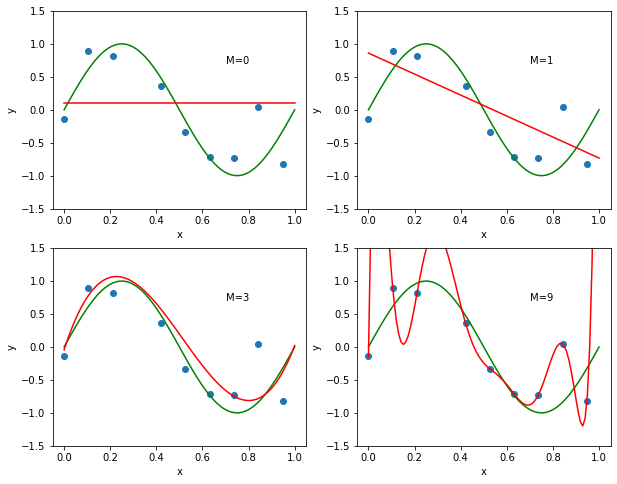

In [7]:
plt.figure(figsize=(10, 8))
for i in range(len(order)):
    plt.subplot(int(len(order)/2),2,i+1)

    plt.plot(np.sort(x_train), y_train[np.argsort(x_train)],'o') #train_dot
    plt.plot(x_sample, y_sample_original, color='g') # y = sin(2*pi*X) + N -- green

    plt.plot(x_sample, y_sample_predict_list[i], color='r') # predict fun -- red

    plt.text(0.7,0.7,'M='+str(order[i]))
    plt.xlabel('x')  
    plt.ylabel('y')  
    plt.ylim(-1.5, 1.5)

## e. Train Error VS Test Error

[1.6159358976605678, 1.361494286224007, 1.2455325413741585, 3.281252647143907]

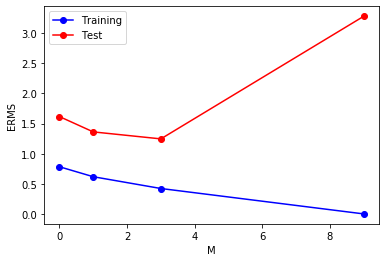

In [8]:
plt.plot(order, train_error,'o-b')
plt.plot(order, test_error,'o-r')
plt.legend(['Training','Test'])
plt.xlabel('M')  
plt.ylabel('ERMS') 
test_error

## f. 100 more Data

(-2, 2)

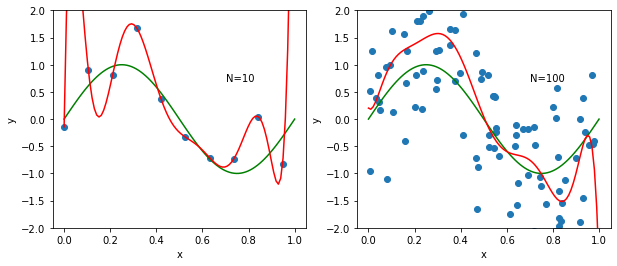

In [9]:
# x_100 = np.linspace(0,1,100)
np.random.seed(99)
x_100 = np.random.uniform(0, 1, 100)
y_100 = np.asarray([np.sin(2*pi*xi)+np.random.normal(0,1) for xi in list(x_100)])

X_100 = x_100.reshape(-1, 1)


model = Pipeline([
    ('poly', PolynomialFeatures(degree=9)),
    ('linear', LinearRegression(fit_intercept=False))
])
    
model = model.fit(X_100, y_100)
w = model.named_steps['linear'].coef_
weight_list.append(w)
y_100_predict = model.predict(X_100)

plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.plot(np.sort(x_train), y_train[np.argsort(x_train)],'o') #train_dot
plt.plot(x_sample, y_sample_original, color='g') # y = sin(2*pi*X) + N -- green
plt.plot(x_sample, y_sample_predict_list[3], color='r') # predict fun -- red
plt.text(0.7,0.7,'N=10')
plt.xlabel('x')  
plt.ylabel('y')  
plt.ylim(-2, 2)
    
plt.subplot(1,2,2)
plt.plot(np.sort(x_100), y_100[np.argsort(x_100)],'o') #train_dot
plt.plot(x_sample, y_sample_original, color='g') # y = sin(2*pi*X) + N -- green
plt.plot(x_sample, model.predict(x_sample), color='r') # predict fun -- red
plt.text(0.7,0.7,'N=100')
plt.xlabel('x')  
plt.ylabel('y')  
plt.ylim(-2, 2)

## g. Regularize Sum of Weights

In [10]:
from sklearn.linear_model import Ridge

lambda_value = [1, 0.1, 0.001, 0.0001, 0.00001, 0.000001]

weight_list = []
train_error_regularize=[]
test_error_regularize=[]

y_regularize_predict_list = []

for i in range(len(lambda_value)):
    
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=9)),
        ('linear', Ridge(alpha=lambda_value[i], fit_intercept=True))
    ])
    
    model = model.fit(X_train, y_train)
    w = model.named_steps['linear'].coef_
    weight_list.append(list(w))

    y_sample_predict = model.predict(x_sample)
    y_regularize_predict_list.append(y_sample_predict)

    y_train_predict = model.predict(X_train)
    train_error_regularize.append(calculate_erms(y_train_predict, y_train))
    y_test_predict = model.predict(X_test)
    test_error_regularize.append(calculate_erms(y_test_predict, y_test))


## g. Chart for Each Lambda

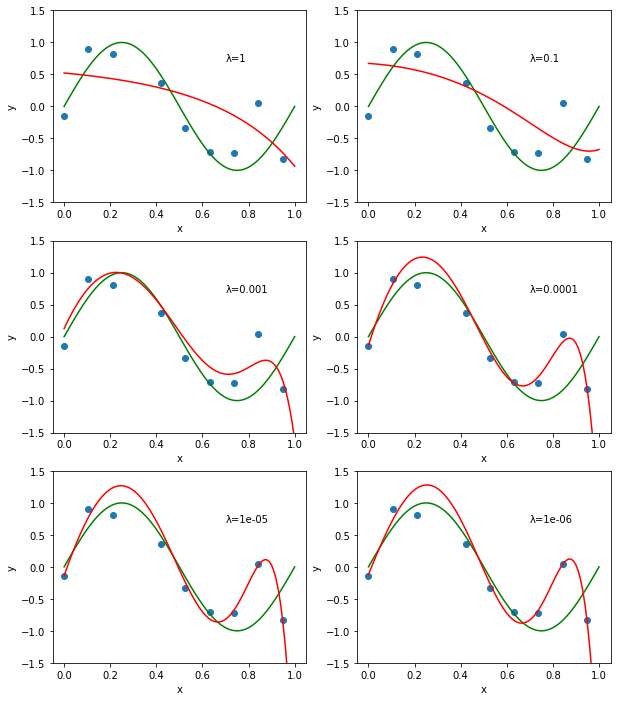

In [11]:
plt.figure(figsize=(10, 12))
for i in range(len(lambda_value)):
    plt.subplot(int(len(lambda_value)/2),2,i+1)

    plt.plot(np.sort(x_train), y_train[np.argsort(x_train)],'o') #train_dot
    plt.plot(x_sample, y_sample_original, color='g') # y = sin(2*pi*X) + N -- green

    plt.plot(x_sample, y_regularize_predict_list[i], color='r') # predict fun -- red

    plt.text(0.7,0.7,'λ='+str(lambda_value[i]))
    plt.xlabel('x')  
    plt.ylabel('y')  
    plt.ylim(-1.5, 1.5)

## i. Test and Train Error According to Lambda

[1, 0.1, 0.001, 0.0001, 1e-05, 1e-06]
[1.4747142553679895, 1.3639958613469476, 1.4532478553537644, 1.7287248126968775, 1.8837689730161864, 1.8848041322412086]


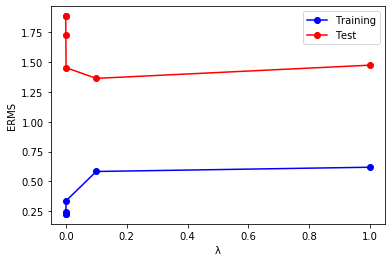

In [12]:
plt.plot(lambda_value, train_error_regularize,'o-b')
plt.plot(lambda_value, test_error_regularize,'o-r')
plt.legend(['Training','Test'])
plt.xlabel('λ')  
plt.ylabel('ERMS') 
print(lambda_value)
print(test_error_regularize)

## j. My Model

Based on the test performance, the best model is the model with roder of 6 and lambda of 0.1.